This notebook defines a datatype for quality traceability of all SysML elements.

1. Definition.
2. Usage example.
3. Filtering example.

In [11]:
package TracingAnnotations {
	 
	import Base::*;
	import ScalarValues::*;
	import Time::TimeInstantValue;
	import IntegerFunctions::*;
	
	attribute def ConfidenceTracing {
		attribute confidence : Real;
		assert constraint confBtz0n1  { confidence >= 0.0 && confidence <= 1.0 } 
		attribute description : String;
		attribute impact : Anything[*];
	}
	 
	attribute def ExplainableTracing {
		attribute description : String;
		attribute confidence : Real;
		attribute evidence : Evidence;
		attribute agent : Agent;
		attribute impact : Anything[*];
	}  
	
	attribute def Agent {
		attribute description : String;
	}
	
	attribute def HumanAgent :> Agent {
		attribute role : String;
	}
	
	attribute def MachineAgent :> Agent {
		attribute type : String;
	}
	
	attribute def Evidence {
		attribute description : String; 
		attribute confidence : Real; 
	} 
	
	attribute def AnnotationEvidence :> Evidence {
		attribute explanation : String;
	}
	
	attribute def RuleEvidence :> Evidence {
		attribute rule : String;
		attribute parameters : String[*];
		attribute executionDate : TimeInstantValue;
	}
	
	attribute def AIEvidence :> Evidence {
		attribute algorithm : String;
		attribute parameters : String[*];
		attribute executionDate : TimeInstantValue;
		attribute precision : Real;
		assert constraint { precision >= 0.0 && precision <= 1.0 } 
		attribute recall : Real;
		assert constraint { recall >= 0.0 && recall <= 1.0 } 
	}	
    
    enum def TraceTypes {type1; type2; type3;}
    attribute def TraceType {
        attribute type : TraceTypes;
    }
}

Package TracingAnnotations (502dc9dc-4971-477a-89a0-d40a73c9df44)


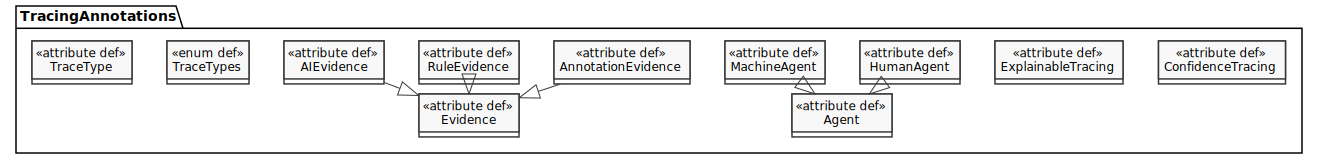

In [15]:
%viz TracingAnnotations

In [3]:
package Tracing_SimpleExample {
	import TracingAnnotations::*;
	
	
	part vehiculetest {
		part wheel: Anything;
	}
	part vehiculetest2 :> vehiculetest {}
	
	
	attribute ev_vehiculetest : AIEvidence {
		:>> algorithm = "ROUGE";
		:>> parameters = {};
		:>> executionDate { :>> num = 0123456;}		
		:>> precision = 0.9;
		:>> recall = 0.9;
	}
	
	attribute ag_vehiculetest : MachineAgent {
		:>> type = "NLP_AI_ROUGE";
		:>> description = "Something about the use of AI for NLP in Sw Eng.";
	}
	
	connection testLink2 connect vehiculetest.wheel to vehiculetest2.wheel {
		/* Tracing information. */
		@ConfidenceTracing {
			confidence = 0.95;
			description = "connection btw vehiculetest*.wheel";
		}
	}
	
	connection testLink connect vehiculetest.wheel to vehiculetest2.wheel {
		@ExplainableTracing {
			description = "Something";
			confidence = 0.95;
			evidence = (ev_vehiculetest);
			agent = ag_vehiculetest;
		}
	}
	
	
	connection testLink3 connect vehiculetest.wheel to vehiculetest2.wheel;
	metadata testLink3_md: ExplainableTracing about testLink3 {
		description = "Something";
			confidence = 0.95;
			evidence = (ev_vehiculetest);
			agent = ag_vehiculetest;
	}
    
    metadata TraceType about testLink3 {type = type2;}
}
	

Package Tracing_SimpleExample (79c41b31-3254-4253-94ce-a10089303367)


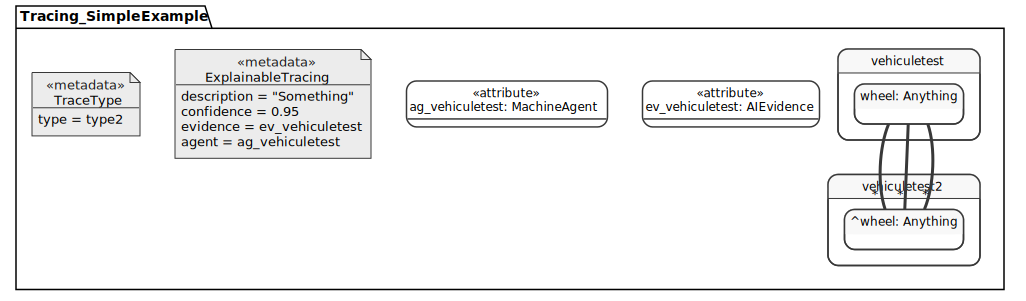

In [4]:
%viz --view=interconnection Tracing_SimpleExample

In [107]:
package Tracing_FilterExample {
	import TracingAnnotations::*;	/* Elements of the system. */
	part end1 {}
	part end2 {}
	part end3 {}
	part end4 {}
	part end5 {}
	part end6 {}
	part end7 {}
	part end8 {}
	
	/* Trace links */
	connection testLink95 connect end1 to end2 
      {@ConfidenceTracing { confidence = 0.95; } @TraceType {type = type1;}}
	connection testLink85 connect end1 to end3 
      {@ConfidenceTracing { confidence = 0.85; }}
	connection testLink75 connect end1 to end4 
      {@ConfidenceTracing { confidence = 0.75; } @TraceType {type = type1;}}
	connection testLink65 connect end5 to end6 
      {@ConfidenceTracing { confidence = 0.65; }}
	connection testLink55 connect end6 to end7 
      {@ConfidenceTracing { confidence = 0.55; }}
	connection testLink45 connect end7 to end8 
      {@ConfidenceTracing { confidence = 0.45; } @TraceType {type = type1;}}
	connection testLink35 connect end8 to end7 
      {@ConfidenceTracing { confidence = 0.35; }}
	connection testLink25 connect end8 to end6 
      {@ConfidenceTracing { confidence = 0.25; } @TraceType {type = type1;}}
}

Package Tracing_FilterExample (55d7bd77-f295-4f90-a282-4e50a65019cd)


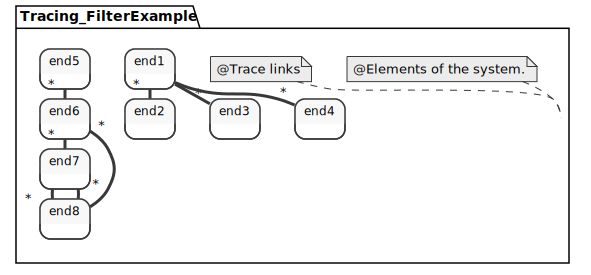

In [108]:
%viz Tracing_FilterExample

In [109]:
	
import TracingAnnotations::*;
	/* Filter example - full notation */
	package ConfidenceLevel {
		/* Connections that satisfy a threshold confidence level (0.5). */
        import Tracing_FilterExample::**;
        filter @ConfidenceTracing && ConfidenceTracing::confidence >= 0.5;
    }

Comment (10a18e15-bd50-41f0-ba4e-68b48c2ef07f)
Package ConfidenceLevel (21cbb28a-fd80-4d2e-83fc-a8231ee81d87)


In [110]:
%list ConfidenceLevel::*

Comment (8e5016c1-0ad9-43d9-a015-2e3d2e96fca1)
OperatorExpression (8ffa4d48-f0b6-4a80-9a65-702709ab49bc)
AnnotatingFeature (2e97065b-3efb-4e8c-ac5a-8a2ea549e111)
AnnotatingFeature (23a2997e-3d44-4083-b2c6-7ccc51480572)
AnnotatingFeature (1f4ce9c0-6750-4fa4-af08-d16ddeea62b1)
AnnotatingFeature (c5e10992-5147-447d-82fc-7ef29f263d4f)
AnnotatingFeature (d5722387-b28c-4736-bf85-294daa89ea5b)
ConnectionUsage testLink55 (c561dd6d-341c-46bc-9804-4e04bb9426dc)
ConnectionUsage testLink65 (38824a98-873d-4028-a78f-0431f8f4f1ec)
ConnectionUsage testLink75 (b1cd5ca9-303c-43ad-b69b-25c0d139fc93)
ConnectionUsage testLink85 (756144e7-4689-4cda-9be9-a1c2090fba17)
ConnectionUsage testLink95 (64b85b55-cdcd-443e-9b46-399d696eeaef)


In [5]:
import TracingAnnotations::*;
	/* Filter example - full notation */
	package ConfidenceLevelnType {
		/* Connections that satisfy a threshold confidence level (0.5). */
        import Tracing_FilterExample::**;
        filter @TraceType && @TraceType::type == TraceTypes.test1;
    }

ERROR:Couldn't resolve reference to Element 'test1'. (5.sysml line : 6 column : 61)
ERROR:Couldn't resolve reference to Element 'Tracing_FilterExample'. (5.sysml line : 5 column : 16)
ERROR:Must be model-level evaluable (5.sysml line : 6 column : 9)
ERROR:Must be a valid feature (5.sysml line : 6 column : 50)
ERROR:Must be a valid feature (5.sysml line : 6 column : 61)
ERROR:Must be a valid feature (5.sysml line : 6 column : 50)
ERROR:Must be a valid feature (5.sysml line : 6 column : 61)
ERROR:Must be a valid feature (5.sysml line : 6 column : 50)
ERROR:Must be a valid feature (5.sysml line : 6 column : 61)
ERROR:Must be a valid feature (5.sysml line : 6 column : 50)
ERROR:Must be a valid feature (5.sysml line : 6 column : 61)
ERROR:Must be a valid feature (5.sysml line : 6 column : 50)
ERROR:Must be a valid feature (5.sysml line : 6 column : 61)
ERROR:Must be a valid feature (5.sysml line : 6 column : 50)
ERROR:Must be a valid feature (5.sysml line : 6 column : 61)
ERROR:Must be a va

In [6]:
%list ConfidenceLevelnType::*

ERROR:Couldn't resolve reference to Namespace 'ConfidenceLevelnType::'. (6.sysml line : 1 column : 8)


In [10]:
%viz -h

ERROR:Couldn't resolve reference to Element 'end1'
